In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import torch
from model.SimCLR import SimCLR
from model.Train import Trainer
from model.Losses import NTXentLoss
from utils.DataLoaderDegradation import DataLoaderDegradation as DLD
from torch.utils.data import DataLoader, random_split

In [112]:
path_rol_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed" 
path_rol_super_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_super_compressed" 

path_sim_rol_extracted_comp = "C:/Cours-Sorbonne/M1/Stage/src/data/similaires_rol_extracted_nn_compressed" 
path_filtered = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_compressed/json_filtered"
path_targets = "C:/Cours-Sorbonne/M1/Stage/src/data/rol_sim_rol_triplets/targets.npy"

## Params

In [113]:
epochs = 10
image_size = 128
num_classes = 1
batch_size = 8
learning_rate = 1e-4
train_ratio = 0.8
val_ratio = 0.2

In [114]:
dataset = DLD(path_rol_comp, path_sim_rol_extracted_comp, path_filtered, shape=(256, 256), target_path=path_targets)

train_size = int(train_ratio * len(dataset))
val_size = len(dataset) - train_size

train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)

[INFO] Loaded exsisting targets


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


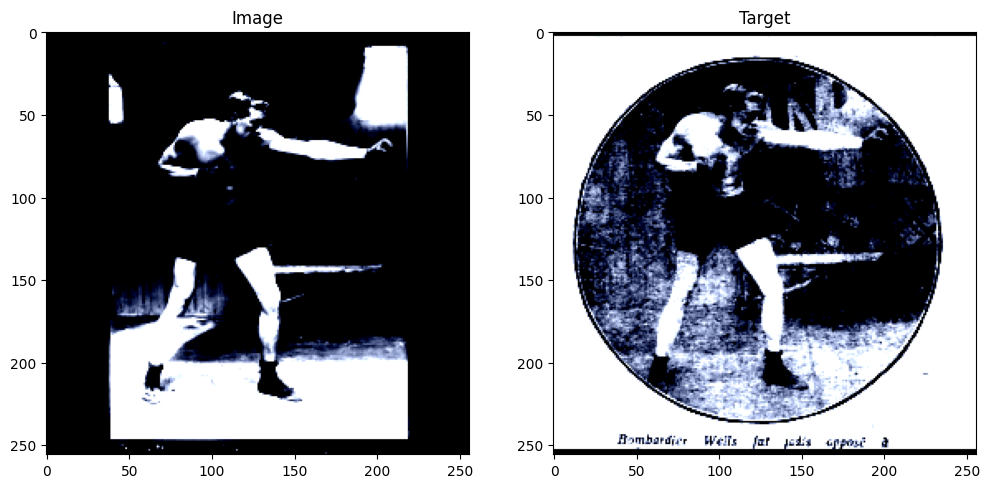

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


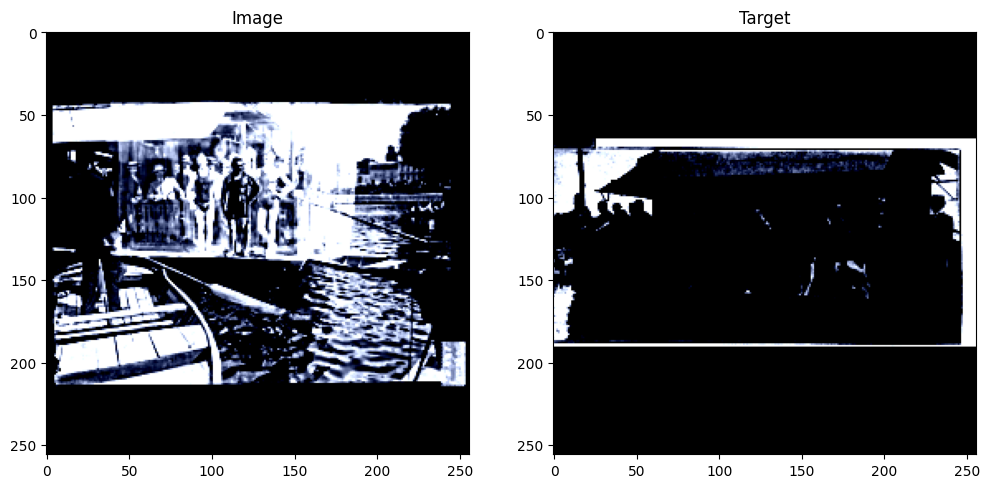

In [115]:
DLD.show_data(train_loader)
DLD.show_data(val_loader)

# Approche Supervisé

In [116]:
model = SimCLR(feature_size=128)
optimizer = torch.optim.AdamW
loss_fn = NTXentLoss(temperature=1)

In [117]:
trainer = Trainer()
trainer.set_model(model, "SimCLR-128") \
.set_optimizer(optimizer) \
.set_loss(loss_fn) 

model = trainer.fit(train_data=train_loader, validation_data=val_loader, learning_rate=learning_rate, verbose=True, epochs=1, sim_clr=True)

[INFO] Model's device is : cuda


  0%|          | 0/1 [00:00<?, ?it/s]

Training...
Validating...


100%|██████████| 1/1 [08:36<00:00, 516.05s/it]

Epoch : 0, Train loss : 2.386861566454172, Validation loss : 2.30269955098629


# Approche Non Supervisé